In [1]:
!nvidia-smi

Sun May  5 04:39:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os 
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Au5tZKN3bAL6Fgipnl1p")
project = rf.workspace("customyolo-k3lvg").project("drones-rom1a")
version = project.version(1)
dataset = version.download("yolov8")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you ha


Extracting Dataset Version Zip to drones-1 in yolov8:: 100%|██████████| 31713/31713 [00:04<00:00, 7715.66it/s] 


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=500 plots=True

/kaggle/working
100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 210MB/s]
New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/datasets/drones-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
confusion_matrix_normalized.png			   val_batch1_labels.jpg
events.out.tfevents.1714884110.2ae867ec8f4a.111.0  val_batch1_pred.jpg
labels.jpg					   val_batch2_labels.jpg
labels_correlogram.jpg				   val_batch2_pred.jpg
results.csv					   weights


/kaggle/working


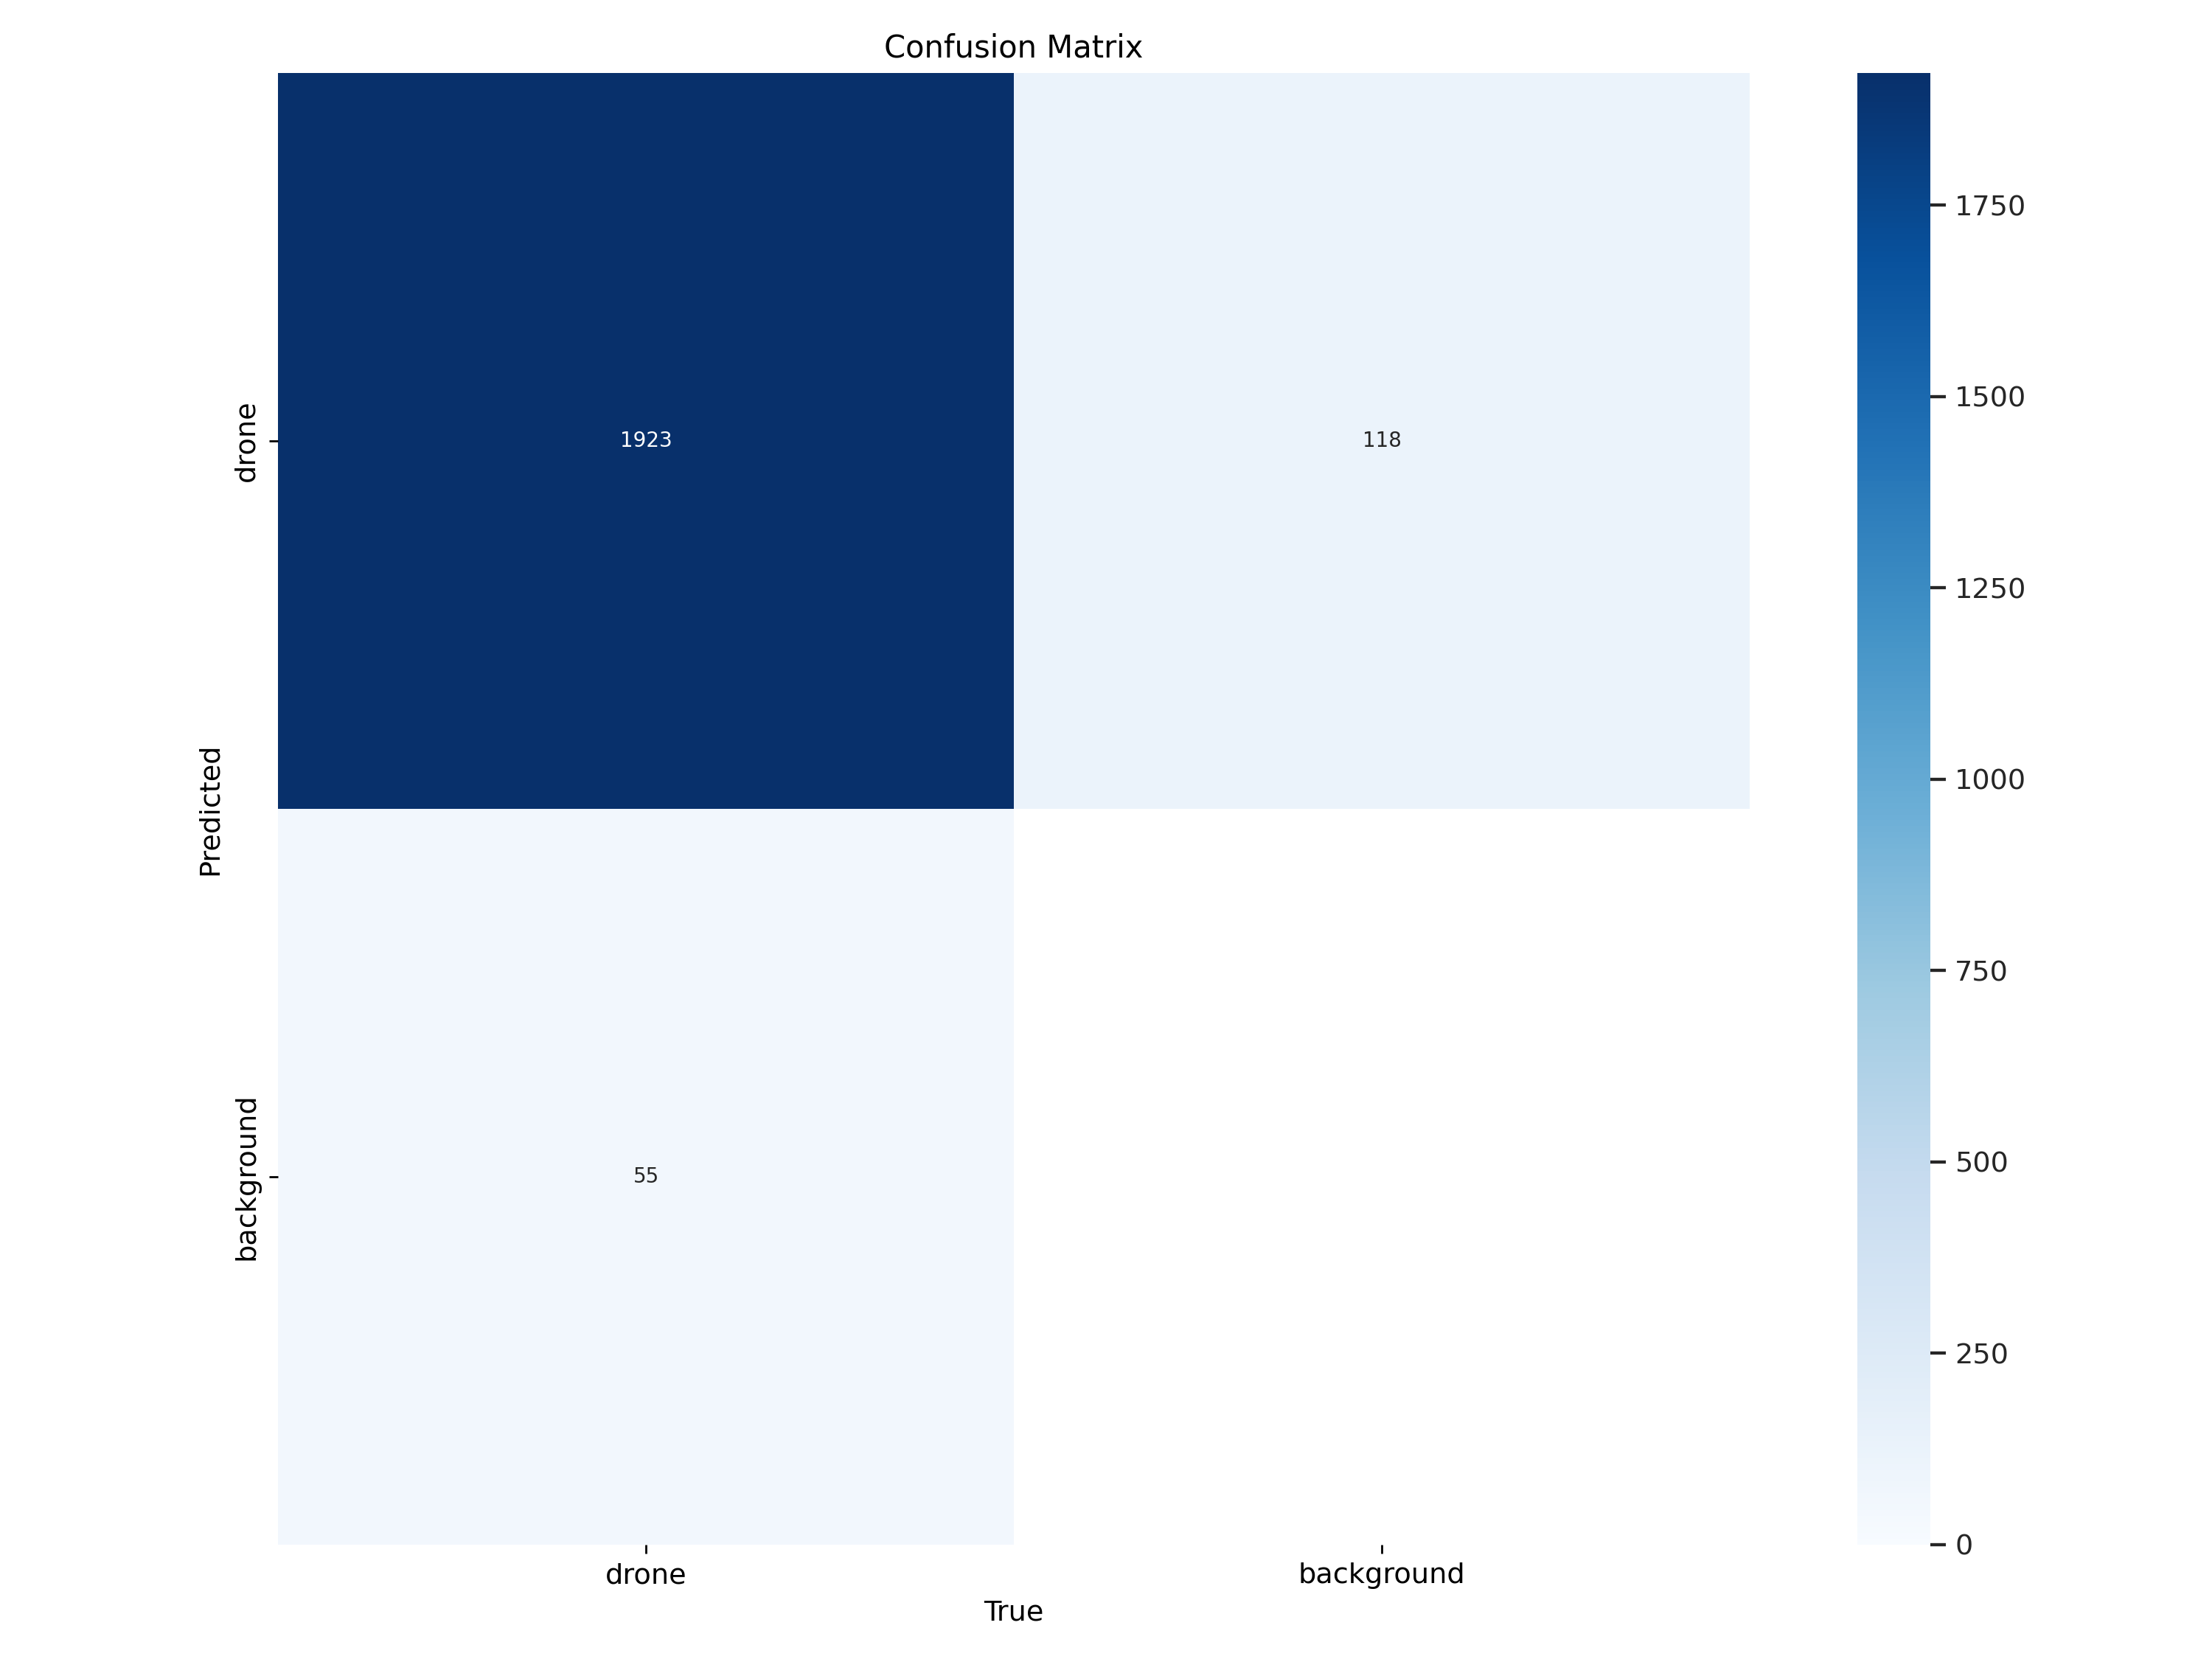

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

/kaggle/working


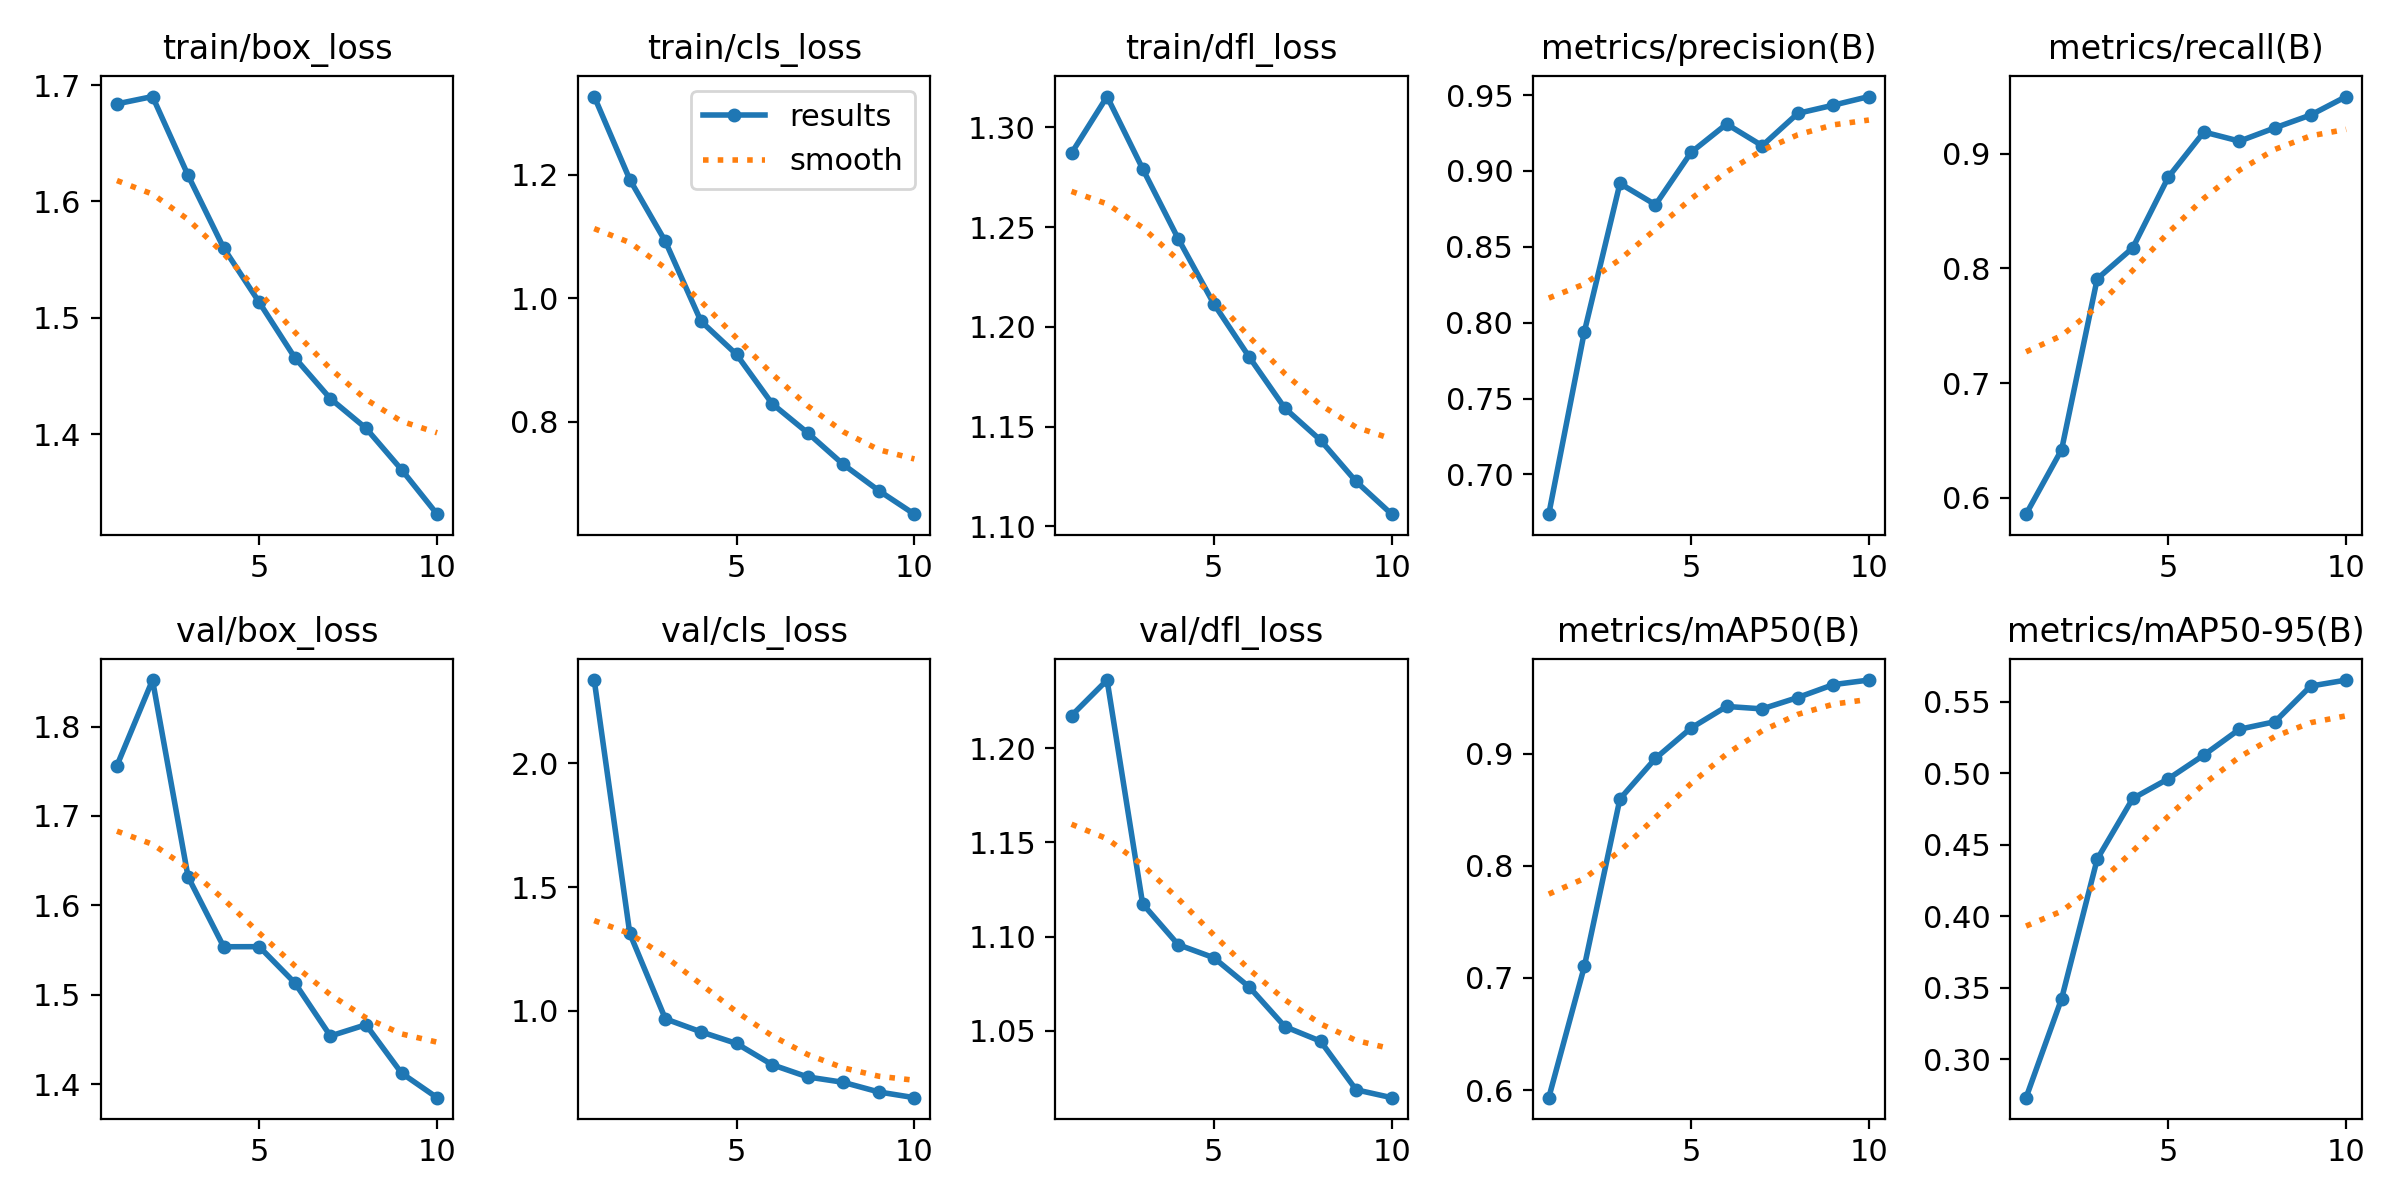

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/datasets/drones-1/valid/labels.cache... 1983 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1983       1978      0.947      0.948      0.963      0.566
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/kaggle/input/small-drone-dataset/test/images/00085_jpg.rf.4540f9c98366c7c1b6dc067ea0d030c4.jpg' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/small-drone-dataset/test/images/00085_jpg.rf.4540f9c98366c7c1b6dc067ea0d030c4.jpg: 512x512 1 drone, 26.4ms
Speed: 3.9ms preprocess, 26.4ms inference, 508.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


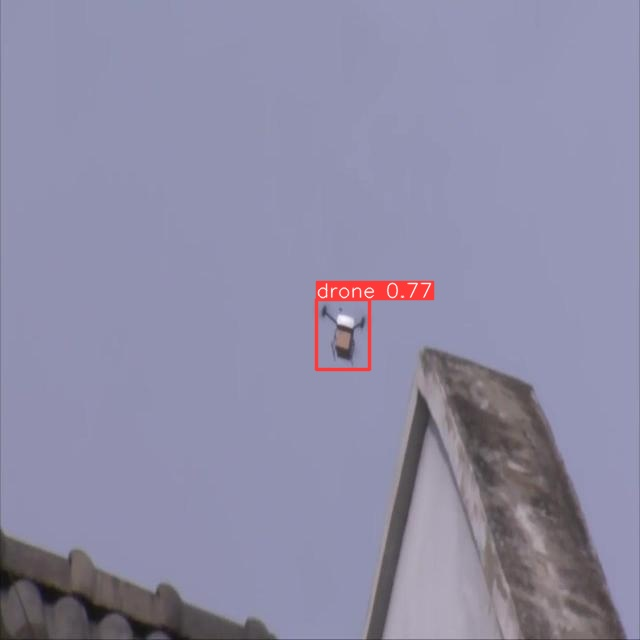

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [17]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/307) /kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4: 288x512 (no detections), 92.0ms
video 1/1 (2/307) /kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4: 288x512 (no detections), 17.8ms
video 1/1 (3/307) /kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4: 288x512 (no detections), 17.8ms
video 1/1 (4/307) /kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4: 288x512 (no detections), 17.8ms
video 1/1 (5/307) /kaggle/input/drone-video/NEVER DO THIS with your drone - YouTube - Google Chrome 2024-05-05 11-15-35.mp4: 288x512 (no detections), 17.7ms
video 1/1 (6/307) /kaggle/input/drone-video/NEVER D

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/kaggle/input/small-drone-dataset/train/images' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/163 /kaggle/input/small-drone-dataset/train/images/00003_jpg.rf.32ab4bc6015d746ecc6380c6ff9872d3.jpg: 512x512 1 drone, 26.3ms
image 2/163 /kaggle/input/small-drone-dataset/train/images/00003_jpg.rf.acbc66b642ab72068c8afb11203e3a00.jpg: 512x512 1 drone, 25.5ms
image 3/163 /kaggle/input/small-drone-dataset/train/images/00011_jpg.rf.01bd575b91feaeb73dc805ee020b659e.jpg: 512x512 1 drone, 25.4ms
image 4/163 /kaggle/input/small-drone-dataset/train/images/00011_jpg.rf.bb06d05f76ebdf450ed31ec7e30a9c76.jpg: 512x512 1 drone, 25.3ms
image 5/163 /kaggle/input/small-drone-dataset/train/images/00050_jpg.rf.cb02a4369a153f1ea2c661b3485c6292.jpg: 512x512 1 drone, 25.4ms
image 6/163 /kaggle/input/small-drone-dataset/train/images/00060_jpg.rf.3447805e590c963bf2ec2d113b712148.jpg: 512x512 1 drone, 25.3ms
image 7/163 /kaggle/input/small-

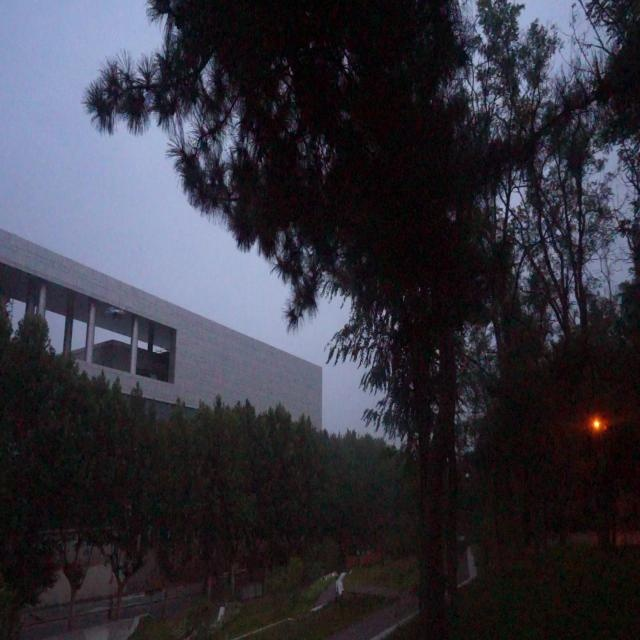

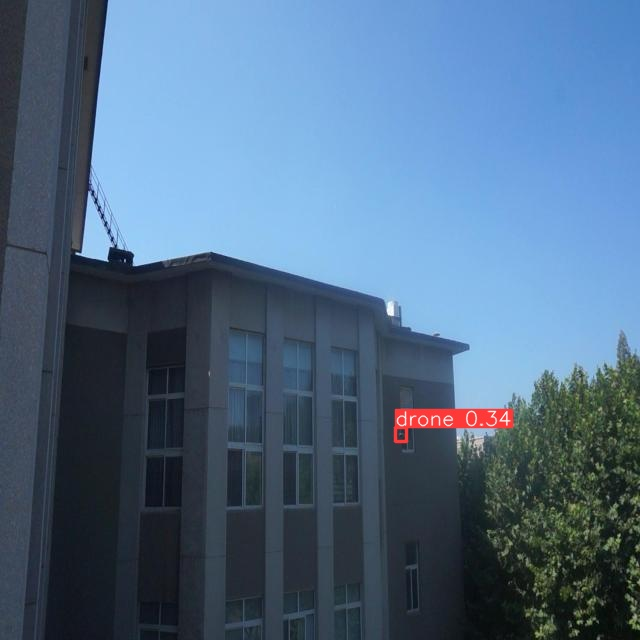

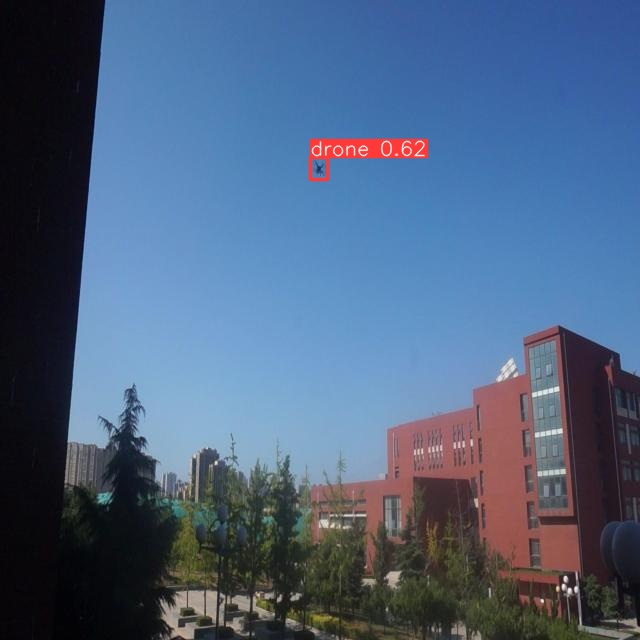

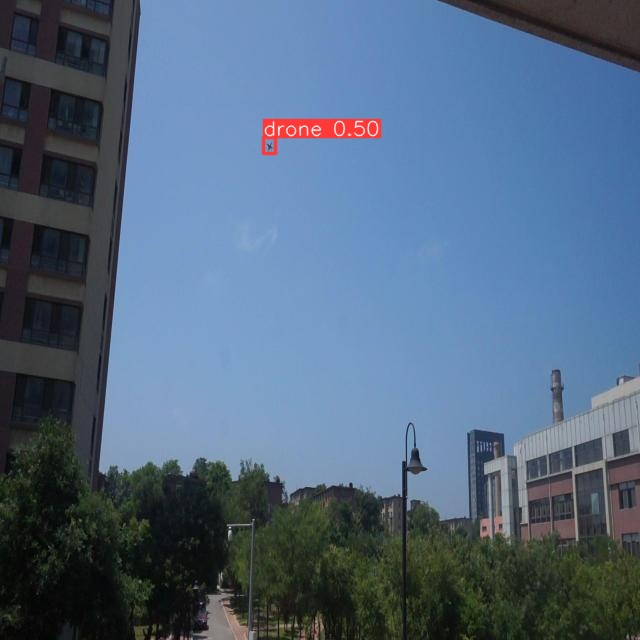

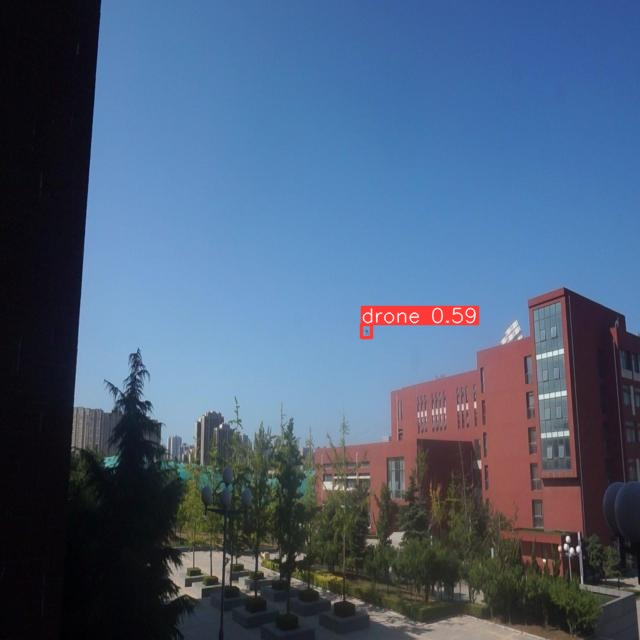

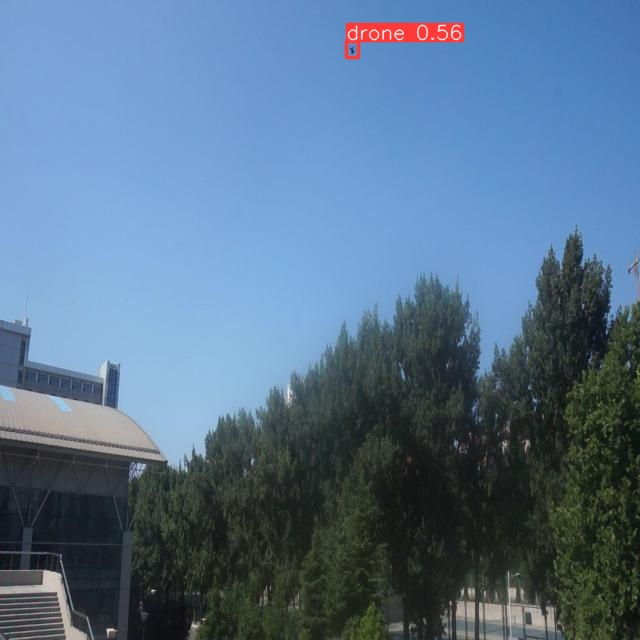

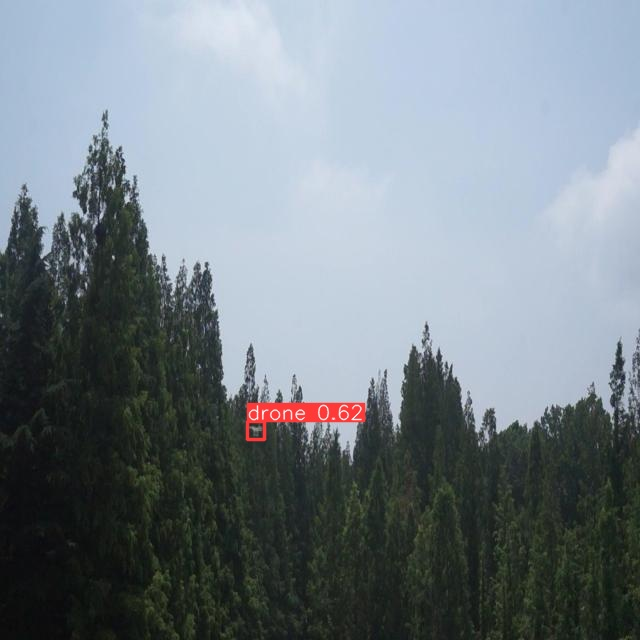

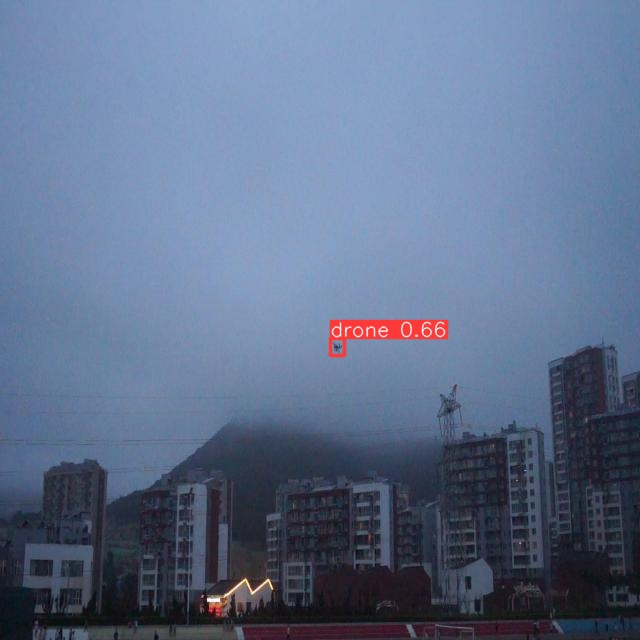

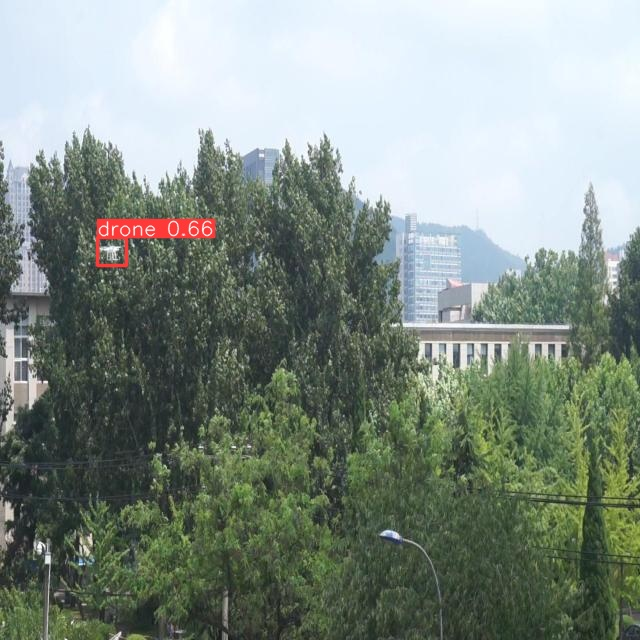

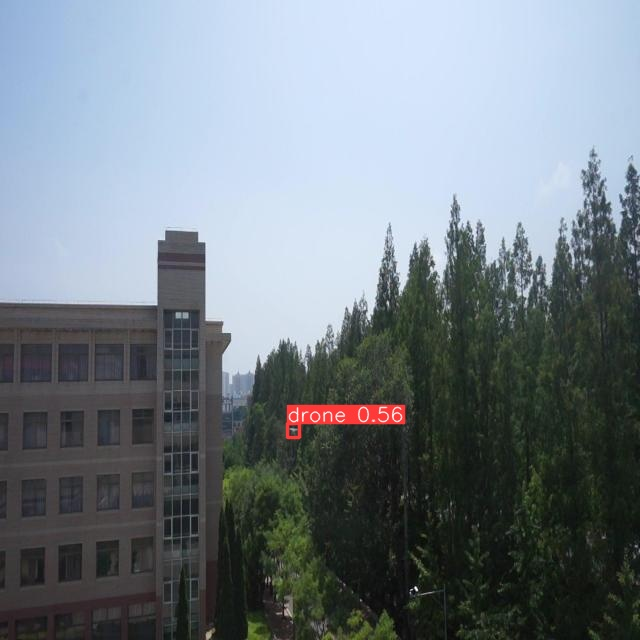

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [27]:
!ls

datasets  file.zip  runs  yolov8m.pt  yolov8n.pt


In [6]:
!yolo task=detect mode=predict model=/kaggle/input/yolo-pretrained-model/best.pt conf=0.25 source='/kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - Google Chrome 2024-05-05 15-50-39.mp4' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/295) /kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - Google Chrome 2024-05-05 15-50-39.mp4: 288x512 (no detections), 119.7ms
video 1/1 (2/295) /kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - Google Chrome 2024-05-05 15-50-39.mp4: 288x512 (no detections), 17.8ms
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (3/295) /kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - Google Chrome 2024-05-05 15-50-39.mp4: 288x512 1 drone, 17.8ms
video 1/1 (4/295) /kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - Google Chrome 2024-05-05 15-50-39.mp4: 288x512 1 drone, 17.8ms
video 1/1 (5/295) /kaggle/input/drone-video-1/What Happened This Year NASA  December 15 2016 - YouTube - 